In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
df=pd.read_csv('data (2).csv')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [82]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
for i in df.columns:
  print(f'column name:{i}')
  print(df[i].value_counts())
  print('#####'*10)


column name:Loan_ID
Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001024    1
LP001020    1
LP001018    1
LP001014    1
LP001013    1
Name: count, Length: 614, dtype: int64
##################################################
column name:Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
##################################################
column name:Married
Married
Yes    398
No     213
Name: count, dtype: int64
##################################################
column name:Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
##################################################
column name:Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
##################################################
column name:Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
##################################################
column name:ApplicantIncome
App

In [84]:
df.isnull().sum()
df.dropna(inplace=True)

In [85]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


<Axes: xlabel='Gender', ylabel='count'>

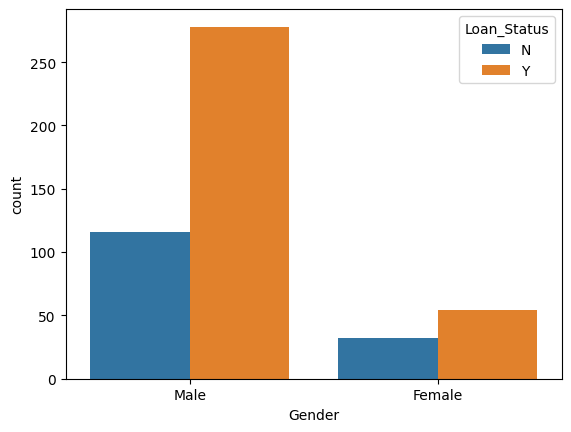

In [86]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Education', ylabel='count'>

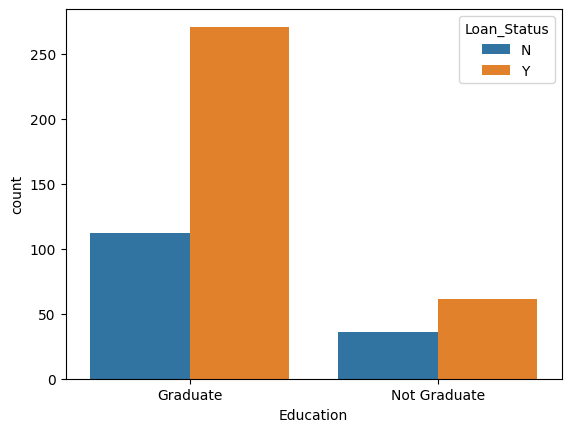

In [87]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [88]:
def graph(col):
  sns.countplot(x=col,hue='Loan_Status',data=df)


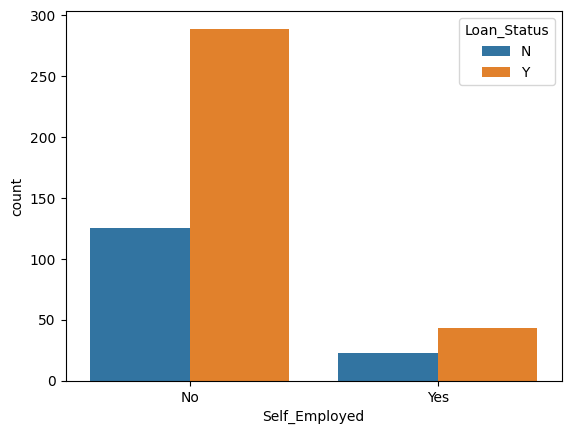

In [89]:
graph('Self_Employed')

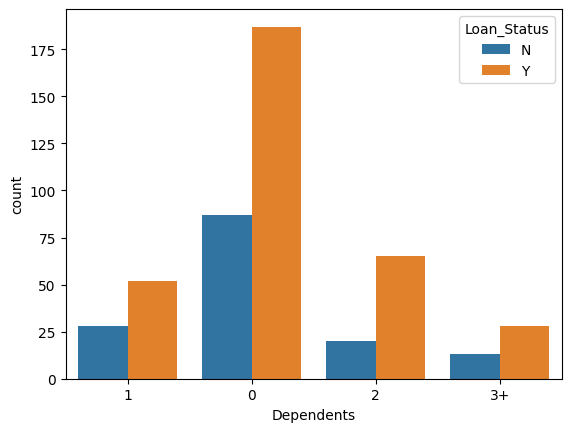

In [90]:
graph('Dependents')

In [91]:
df['Gender'].value_counts()

,count
Gender,
Male,394
Female,86


In [92]:
from sklearn.preprocessing import OneHotEncoder
df=pd.get_dummies(df,columns=['Married','Gender','Self_Employed','Dependents'],drop_first=True)

In [93]:
df['Education'].replace(['Not Graduate','Graduate'],[1,2], inplace=True)

<ipython-input-93-53f72fd78e80>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].replace(['Not Graduate','Graduate'],[1,2], inplace=True)
<ipython-input-93-53f72fd78e80>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'].replace(['Not Graduate','Graduate'],[1,2], inplac

In [94]:
df.drop(columns=['Loan_ID'],inplace=True)

In [95]:
df['Property_Area'].replace(['Rural','Urban','Semiurban'],[1,2,3], inplace=True)

<ipython-input-95-a2626effa434>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property_Area'].replace(['Rural','Urban','Semiurban'],[1,2,3], inplace=True)
<ipython-input-95-a2626effa434>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Property_Area'].replace(['Rural','Urban','Semiurban']

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          480 non-null    int64  
 1   ApplicantIncome    480 non-null    int64  
 2   CoapplicantIncome  480 non-null    float64
 3   LoanAmount         480 non-null    float64
 4   Loan_Amount_Term   480 non-null    float64
 5   Credit_History     480 non-null    float64
 6   Property_Area      480 non-null    int64  
 7   Loan_Status        480 non-null    object 
 8   Married_Yes        480 non-null    bool   
 9   Gender_Male        480 non-null    bool   
 10  Self_Employed_Yes  480 non-null    bool   
 11  Dependents_1       480 non-null    bool   
 12  Dependents_2       480 non-null    bool   
 13  Dependents_3+      480 non-null    bool   
dtypes: bool(6), float64(4), int64(3), object(1)
memory usage: 36.6+ KB


In [97]:
df.isnull().sum()

,0
Education,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Property_Area,0
Loan_Status,0
Married_Yes,0
Gender_Male,0


In [98]:

#df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [99]:

for i in df.columns:
  print(f'column name:{i}')
  print(df[i].value_counts())
  print('#####'*10)

column name:Education
Education
2    383
1     97
Name: count, dtype: int64
##################################################
column name:ApplicantIncome
ApplicantIncome
2500     7
4583     6
2600     5
6000     4
4166     4
        ..
39147    1
2178     1
9328     1
4885     1
2221     1
Name: count, Length: 405, dtype: int64
##################################################
column name:CoapplicantIncome
CoapplicantIncome
0.0       216
1666.0      5
2500.0      4
5625.0      3
2083.0      3
         ... 
3300.0      1
1000.0      1
4301.0      1
1411.0      1
240.0       1
Name: count, Length: 232, dtype: int64
##################################################
column name:LoanAmount
LoanAmount
120.0    13
110.0    13
100.0    13
187.0    12
128.0     9
         ..
36.0      1
146.0     1
142.0     1
496.0     1
253.0     1
Name: count, Length: 186, dtype: int64
##################################################
column name:Loan_Amount_Term
Loan_Amount_Term
360.0    411
180.0     3

In [100]:
df.corr()

ValueError: could not convert string to float: 'N'

In [101]:
plt.figure(figsize=(25,4))
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'N'

<Figure size 2500x400 with 0 Axes>

<Axes: >

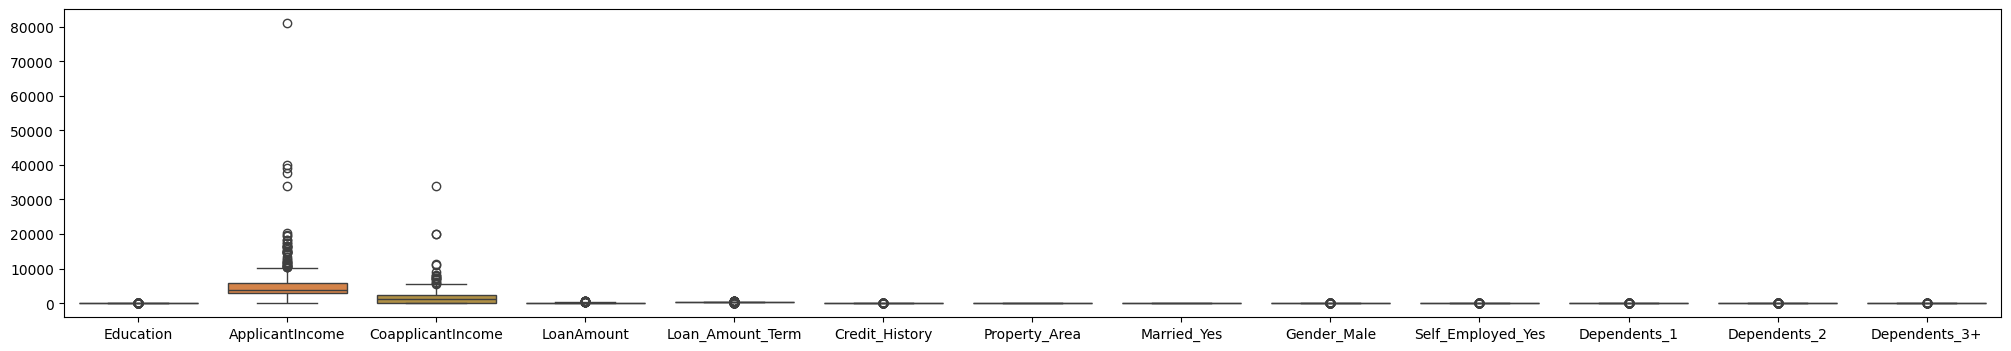

In [102]:
plt.figure(figsize=(25,4))
sns.boxplot(data=df)

Through the boxploat we have an idea pf outliers there is outlier in application income and coapplication income

In [103]:
# def remove_outliers(df, column):
#     df_clean = df.copy()
#     values = df_clean[column]

#     mean = np.mean(values)
#     std = np.std(values)
#     cut_off = 3 * std
#     lower, upper = mean - cut_off, mean + cut_off

#     # Filter out outliers
#     df_clean = df_clean[(values >= lower) & (values <= upper)]

#     return df_clean
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)  # 25th percentile
#     Q3 = df[column].quantile(0.75)  # 75th percentile
#     IQR = Q3 - Q1                   # Interquartile Range

#     lower_bound = Q1 - 1.0 * IQR
#     upper_bound = Q3 + 1.0 * IQR

#     df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_clean

#using above technique we loose our half data so we use robust scaler

#from sklearn.preprocessing import RobustScaler

#scaler = RobustScaler()
#df['ApplicantIncome'] = scaler.fit_transform(df[['ApplicantIncome']])


In [104]:
#df = remove_outliers_iqr(df, 'ApplicantIncome')
#df = remove_outliers_iqr(df, 'CoapplicantIncome')
#df['CoapplicantIncome'] = scaler.fit_transform(df[['CoapplicantIncome']])
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['Loan_Status'] = lb.fit_transform(df['Loan_Status'])

In [105]:
df=df.astype(int)

In [106]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [107]:
x

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Married_Yes,Gender_Male,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+
1,2,4583,1508,128,360,1,1,1,1,0,1,0,0
2,2,3000,0,66,360,1,2,1,1,1,0,0,0
3,1,2583,2358,120,360,1,2,1,1,0,0,0,0
4,2,6000,0,141,360,1,2,0,1,0,0,0,0
5,2,5417,4196,267,360,1,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,2900,0,71,360,1,1,0,0,0,0,0,0
610,2,4106,0,40,180,1,1,1,1,0,0,0,1
611,2,8072,240,253,360,1,2,1,1,0,1,0,0
612,2,7583,0,187,360,1,2,1,1,0,0,1,0


In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [110]:
from sklearn.preprocessing import StandardScaler # Corrected the typo from StandardSclaer to StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [111]:
x_train

array([[-2.081666  , -0.28857143, -0.56357171, ..., -0.43759497,
         2.31076235, -0.30734759],
       [ 0.48038446, -0.276885  , -0.66931748, ..., -0.43759497,
        -0.43275761, -0.30734759],
       [ 0.48038446, -0.49814814,  1.29091203, ..., -0.43759497,
        -0.43275761, -0.30734759],
       ...,
       [ 0.48038446, -0.32113763, -0.14058861, ...,  2.2852182 ,
        -0.43275761, -0.30734759],
       [ 0.48038446, -0.25553778,  0.49694479, ..., -0.43759497,
        -0.43275761, -0.30734759],
       [ 0.48038446, -0.3445105 ,  0.86006355, ..., -0.43759497,
         2.31076235, -0.30734759]])

In [112]:
x_test

array([[-2.081666  , -0.35121072,  0.12596065, ..., -0.43759497,
         2.31076235, -0.30734759],
       [-2.081666  ,  0.19571437, -0.66931748, ..., -0.43759497,
        -0.43275761, -0.30734759],
       [ 0.48038446, -0.31428159,  1.26032441, ..., -0.43759497,
         2.31076235, -0.30734759],
       ...,
       [ 0.48038446, -0.35806676,  0.52753241, ..., -0.43759497,
        -0.43275761, -0.30734759],
       [ 0.48038446,  0.18278139,  0.09537303, ..., -0.43759497,
         2.31076235, -0.30734759],
       [ 0.48038446,  0.07370801, -0.66931748, ..., -0.43759497,
        -0.43275761, -0.30734759]])

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,classification_report,accuracy_score,precision_score,recall_score,confusion_matrix
import pickle
from sklearn.model_selection import RandomizedSearchCV


In [114]:
model_list = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

for model_name, model in model_list.items(): # Iterate through the dictionary items
    model.fit(x_train, y_train)
    # Make prediction
    ytrain_pred = model.predict(x_train)
    ytest_pred = model.predict(x_test)
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, ytrain_pred)
    model_train_f1 = f1_score(y_train, ytrain_pred, average='weighted')
    model_train_recall = recall_score(y_train, ytrain_pred, average='weighted')
    model_train_precision = precision_score(y_train, ytrain_pred, average='weighted')

    print(model_name)  # Print the name of the current model

    print('Model performance for Training set')
    print('-Accuracy:{:.4f}'.format(model_train_accuracy))
    print('-F1 Score:{:.4f}'.format(model_train_f1))
    print('-Recall Score:{:.4f}'.format(model_train_recall))
    print('-Precision Score:{:.4f}'.format(model_train_precision))
    print("-"*30)
    # Testing set performance
    model_test_accuracy = accuracy_score(y_test, ytest_pred)
    model_test_f1 = f1_score(y_test, ytest_pred, average='weighted')
    model_test_recall = recall_score(y_test, ytest_pred, average='weighted')
    model_test_precision = precision_score(y_test, ytest_pred, average='weighted')
    print('Model performance for Test set')
    print('-Accuracy:{:.4f}'.format(model_test_accuracy))
    print('-F1 Score:{:.4f}'.format(model_test_f1))
    print('-Recall Score:{:.4f}'.format(model_test_recall))
    print('-Precision Score:{:.4f}'.format(model_test_precision))
    print("-"*30)


    print('=' * 50)
    print('\n')

LogisticRegression
Model performance for Training set
-Accuracy:0.8155
-F1 Score:0.7964
-Recall Score:0.8155
-Precision Score:0.8257
------------------------------
Model performance for Test set
-Accuracy:0.7986
-F1 Score:0.7619
-Recall Score:0.7986
-Precision Score:0.8439
------------------------------


SVC
Model performance for Training set
-Accuracy:0.8423
-F1 Score:0.8284
-Recall Score:0.8423
-Precision Score:0.8541
------------------------------
Model performance for Test set
-Accuracy:0.7986
-F1 Score:0.7619
-Recall Score:0.7986
-Precision Score:0.8439
------------------------------


GaussianNB
Model performance for Training set
-Accuracy:0.8036
-F1 Score:0.7911
-Recall Score:0.8036
-Precision Score:0.7995
------------------------------
Model performance for Test set
-Accuracy:0.8056
-F1 Score:0.7760
-Recall Score:0.8056
-Precision Score:0.8342
------------------------------


DecisionTreeClassifier
Model performance for Training set
-Accuracy:1.0000
-F1 Score:1.0000
-Recall Sc

In [115]:
##through this we find random forest model is good
##after this apply the best aprameter for increasse the accuracy

In [116]:
##Hyperparameter Tunning
rf_params={'n_estimators':[100,200,300,400,500,1000],
          'criterion':['gini','entroy'],
          'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
          'min_samples_split':[2,3,4,5,6,7,8,10,15,12],
          'max_features':[5,7,'auto',8,10,9,12] }

In [117]:
rf_params

{'n_estimators': [100, 200, 300, 400, 500, 1000],
 'criterion': ['gini', 'entroy'],
 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10, 15, 12],
 'max_features': [5, 7, 'auto', 8, 10, 9, 12]}

In [118]:
rancv_models=['rf',RandomForestClassifier(),rf_params]

In [119]:
rancv_models

['rf',
 RandomForestClassifier(),
 {'n_estimators': [100, 200, 300, 400, 500, 1000],
  'criterion': ['gini', 'entroy'],
  'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10, 15, 12],
  'max_features': [5, 7, 'auto', 8, 10, 9, 12]}]

In [120]:
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.ensemble import RandomForestClassifier

# Store model configuration as a dictionary
#rancv_models = {
#    'rf': [RandomForestClassifier(), rf_params]
#}

#model_param = {}
#for name, (model, params) in rancv_models.items():  # Iterate over dictionary items
#    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=5, verbose=2, n_jobs=-1)
#    random.fit(x_train, y_train)
#   model_param[name] = random.best_params_

#for model_name in model_param:
#    print(f'-------------Best params for: {model_name}')
#    print(model_param[model_name])

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500, min_samples_split=3, max_features=12, max_depth=1, criterion='gini')
rfc.fit(x_train,y_train)
    # Make prediction
ytrpred = rfc.predict(x_train)
ytepred = rfc.predict(x_test)
acc_score=accuracy_score(y_test,ytepred)
print(acc_score)

0.7986111111111112


In [124]:
import pickle

filename = 'rancv_models.pkl'
pickle.dump(model, open(filename, 'wb'))

In [125]:
rf_load = pickle.load(open(filename, 'rb'))